# 1. Introduction to statistical learning methods

1. **Definition:** A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.


2. **Categories:** supervised learning, unsupervised learning and reinforcement leaning.


3. **Three element in statistical learning methods:** model, strategy and algorithm.



### Supervised Learning:

**Supervised Learning** is the machine learning task of learning a function that maps an input to an output based on example input-output paris. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. This requires the learning algorithm to generalize from the training data to unseen situations in a "reasonable" way.

**Algorithms:** 
- Support Vector Machines
- linear regression
- logistic regression
- naive Bayes
- linear discriminant analysis
- decision trees
- k-nearest neighbor algorithm
- Neural Networks (Multilayer perceptron)
- Similarity learning


### Unsupervised Learning

**Unsupervised Learning** is a type of self-organized Hebbian learning that helps find previously unknown patterns in data set without pre-existing labels. It is also known as self-organization and allows modeling probability densities of given inputs.

**Algorithms:**
- Clustering: k-means
- Neural Networks
- Expectation-maximization algorithm (EM)


### Reinforcement Learning
**Reinforcement Learning** is an area of machine learning concerned with how software agents ought to take actions in an environment in order to maximize some notion of cumulative reward. It differs from supervised learning in not needing labelled input/output pairs be presented, and in not needing sub-optimal actions to be explicitly corrected. Instead the focus is on finding a balance between exploration (of uncharted territory) and exploitation (of current knowledge).

The environment is typically stated in the form of a Markov decision process (MDP), because many reinforcement learning algorithms for this context utilize dynamic programming techniques. The main difference between the classical dynamic programming methods and reinforcement learning algorithms is that the latter do not assume knowledge of an exact mathematical model of the MDP and they target large MDPs where exact methods become infeasible.

---

## Loss/Cost function
In machine learning theory, it’s a method of evaluating how well specific algorithm models the given data.

#### 0-1 loss function
$$\mathit{L}(Y, f(X) )) = (Y - f(X))^2 = \begin{Bmatrix}
 1,& Y\neq f(X) \\ 
 0,& Y=f(X)
\end{Bmatrix}$$

#### quadratic loss function
$$\mathit{L}(Y, f(X)) = (Y-f(X))^2$$

#### absolute loss function
$$\mathit{L}(Y, f(X)) = \left | Y-f(X) \right |$$

#### logarithmic loss function or log-likelihood loss function
$$\mathit{L}(Y, P(Y|X)) = -\textrm{log}P(Y|X)$$

---

#### Risk function or expected loss
The smaller the loss function value you calculate, the better model you get. As the input and output of the model $(X,Y)$ are random variables and follow by Joint distribution. Therefore, the theoretically expection value of loss function is:
$$\mathit{R_{exp}}(f) = \mathit{E}_P[\mathit{L}(Y,f(X))]=\int _{x\times y}\mathit{L}(y,f(x))P(x,y)\mathrm{dxdy}
$$
The learning goal is to choose the model with the lowest expected risk. As the Joint distribution of $P(X,Y)$ is unknow, we cannot calculate $\mathit{R_{exp}}$ directly. Actually, the Joint distribution of $\mathit{R_{exp}}$ is known, we can use it to calculate the conditional probability distribution of $P(Y|X)$ directly without learning. 

#### Empirical risk or empirical loss
The model $f(x)$ about the average loss on the training dataset is called empirical risk or empirical loss, referred to as $R_{emp}$:
$$R_{\mathrm{emp}}(f) = \frac{1}{N}\sum_{i=1}^{N}\mathit{L}(y_i,f(x_i))$$

The risk function or expected loss $R_{exp}(f)$ is the expected loss of the model on the joint distribution, and the empirical risk or empirical loss $R_{emp}(f)$ is the average loss of the model on the training dataset.

According to the law of large numbers, when the sample size approaches infinity, the empirical loss of $R_{\mathrm{emp}}(f)$ tends to the expected loss $\mathit{R_{exp}}(f)$. So a very natural idea is using the empirical loss to estimate the expected loss. However, we often need to correct the empirical loss because of the limited sample in reality usually leads to unsatisfactory result. There are two basic strategies: empirical risk minimization (EMR) and structural risk minimization (SRM).

### Empirical risk minimization (EMR) and structural risk minimization (SRM)
The **empirical risk minimization (EMR)** strategy believes that the model with lowest value of empirical loss is the best model. According to this strategy, this is an optimization problem, and we can find the optimial model by minimizing the empirical loss value:
$$\underset{f\in F}{\mathrm{min}}\frac{1}{N}\sum_{i=1}^{N}L(y_i,f(x_i))$$
$F$ is the hypothesis space.

When the sampe size is large enough, empirical risk minimization can ensure good learning results, and it is widely used in reality. One example is the maximum likelihood estimation. **But when the sample size is small, it will easily to overfitting.**


The **structural risk minimization (SRM)** was proposed to prevent overfitting. SRM is equal to regularization and it is equal to regularization. The structural risk minimization is based on empirical risk minimization and plus a regularizer or penalty term which representing the complexity of the model. When the hypothesis space, loss function and training dataset is determined, the definition is:
$$R_{srm}(f)=\frac{1}{N}\sum_{i=1}^{N}L(y_i,f(x_i))+\lambda J(f)$$
Where, $J(f)$ is the model complexity. The more complicatedd the model $f$ is, the more complexity $J(f)$, vice versa. $\lambda \geqslant 1$ is coefficient value, used to weight empirical risk and model complexity. The maximum posterior probability estimation (MAP) is one example of SRM.

SRM also is an optimization problem, and we can find the optimial model by minimizing the structural risk value:
$$\underset{f\in F}{min}\frac{1}{N}\sum_{i=1}^{N}L(y_i,f(x_i))+\lambda J(f)$$

---

**Example of using Polynomial to deal with overfitting**

we using target function of $y = \sin 2\pi x$ and plus a normally distributed noise disturbance, then using a Polynomial to deal with overfitting.

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# target function
def real_func(x):
    return np.sin(2*np.pi*x)

# Polynomial
def fit_func(p,x):
    f = np.poly1d(p)
    return f(x)

# Residual
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [3]:
# 10 points
x = np.linspace(0,1,10)
x_points=np.linspace(0,1,1000)
# target function plus normal distribution noise
y_ = real_func(x)
y = [np.random.normal(0,0.1) + y1 for y1 in y_]

def fitting(M=0):
    """
    M is the degree of Polynomial
    """
    # Random initialization of polynomial parameters
    p_init = np.random.rand(M+1)
    # Least squares
    p_lsq = leastsq(residuals_func, p_init, args=(x,y))
    print('Fitting Parameters:', p_lsq[0])
    
    # visualization
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x,y,'bo', label='noise')
    plt.legend()
    return p_lsq

## M=0

Fitting Parameters: [-0.04662573]


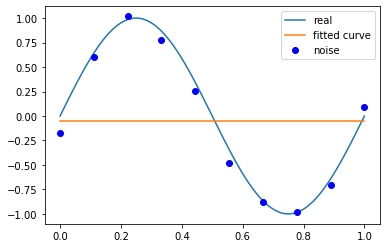

In [20]:
# M=0
p_lsq_0 = fitting(M=0)

## M=1

Fitting Parameters: [-1.22033669  0.56354261]


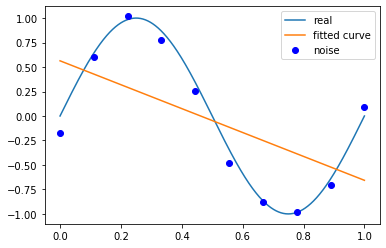

In [19]:
# M=1
p_lsq_1 = fitting(M=1)

## M=3

Fitting Parameters: [ 22.5524649  -33.67360318  11.45998438  -0.19307186]


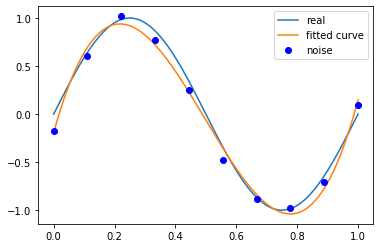

In [18]:
# M=3
p_lsq_3 = fitting(M=3)

## M=9

Fitting Parameters: [-1.35804999e+04  6.18306657e+04 -1.18315288e+05  1.23640695e+05
 -7.67413551e+04  2.88021378e+04 -6.32395006e+03  7.11600492e+02
 -2.37380124e+01 -1.72091250e-01]


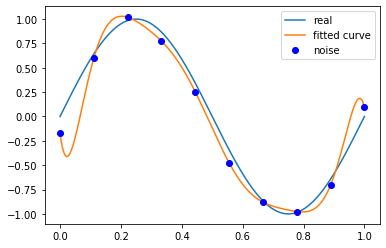

In [17]:
# M=9
p_lsq_9 = fitting(M=9)

## Regularization
In mathematics, statistics, and computer science, particularly in machine learning and inverse problems, regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting.
- L1: regularization*abs(p)
$$L(w) = \frac{1}{N}\sum_{i=1}^{N}(f(x_i;w)-y_i)^2+\lambda\left \| w \right \|_1$$
- L2: 0.5 * regularization * np.square(p)
$$L(w) = \frac{1}{N}\sum_{i=1}^{N}(f(x_i;w)-y_i)^2+\frac{\lambda}{2}\left \| w \right \|^2$$

In [22]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x)-y
    ret = np.append(ret, 
                   0.5*regularization*np.sqrt(np.square(p)))
    return ret

In [23]:
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x,y))

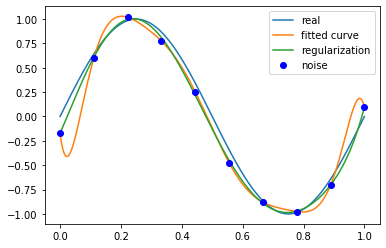

In [24]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points,
        fit_func(p_lsq_regularization[0], x_points),
        label = 'regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

## Generalization error bound
- https://mostafa-samir.github.io/ml-theory-pt2/
- https://sunoonlee.github.io/2017/07/generalization-error-bound/

## Precision and Recall
- TP: true positive
- TN: true negative
- FP: false positive
- FN: false Negative

Precision: $ = \frac{TP}{TP+FP}$


Recall: $= \frac{TP}{TP+FN}$


True negative rate: $=\frac{TN}{TN+FP}$


Imbalanced data accuracy $=\frac{TP+TN}{TP+TN+FP+FN}$


两边取对数：$$\ln L(\theta) = \sum_D \ln P_{\theta}(Y|X) \\ \mathop{\arg \max}_{\theta} \sum_D \ln P_{\theta}(Y|X) = \mathop{\arg \min}_{\theta} \sum_D (- \ln P_{\theta}(Y|X))$$ 反之，经验风险最小化等价于极大似然估计，亦可通过经验风险最小化推导极大似然估计。